<a href="https://colab.research.google.com/github/gangerz/SkillTreePython-DeepLearning/blob/main/01.%EB%94%A5%EB%9F%AC%EB%8B%9Dwith%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C%EC%9A%B0-basic/ch01_05_DNN%EA%B8%B0%EC%B4%88_%EB%8B%A4%EC%A4%91%EB%B6%84%EB%A5%98%EB%AA%A8%EB%8D%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ch01.05. 딥러닝 다중 분류 모델
---
* 날짜: 2022-07-01
* 이름: 윤예현

## 학습내용
    - 딥러닝을 이용한 멀티클래스 분류 진행
    - 적절한 손실함수와 최적화 함수 정의
    - 평가 및 예측
    
## 학습자료

* 모두의딥러닝
* 데이터
  * `iris.csv`
  * MNIST 데이터셋


```
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
seed=1
np.random.seed(seed)
tf.random.set_seed(seed)
```

```
https://github.com/yebiny/SkillTreePython-DeepLearning.git
```

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
seed=1
np.random.seed(seed)
tf.random.set_seed(seed)

In [2]:
!git clone https://github.com/yebiny/SkillTreePython-DeepLearning.git

Cloning into 'SkillTreePython-DeepLearning'...
remote: Enumerating objects: 322, done.
remote: Counting objects: 100% (144/144), done.
remote: Compressing objects: 100% (80/80), done.
remote: Total 322 (delta 94), reused 88 (delta 64), pack-reused 178
Receiving objects: 100% (322/322), 22.21 MiB | 9.63 MiB/s, done.
Resolving deltas: 100% (129/129), done.


## 아이리스 꽃 종류 예측
---


```
- 0 sepal_length  꽃받침 길이
- 1 sepal_width 꽃받침 너비
- 2 petal_length 꽃임 길이
- 3 petal_width 꽃잎 너비
- 4 species 꽃의 종류 {setosa, versicolor virginica}
```
<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DeepLearning/blob/main/imgs/ch0105-01.PNG?raw=true width=550>
</p>


In [8]:
path = '/content/SkillTreePython-DeepLearning/dataset/iris.csv'
dataset = pd.read_csv(path, header = None)
print(dataset.shape)
dataset

(150, 5)


,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [11]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder #머신러닝 라이브러리
from sklearn.model_selection import train_test_split

def path2dataset_iris(path):

  # <불러오기>
  dataset =  pd.read_csv(path, 
                       header=None, 
                       ) # 데이터 형식 : pandas의 데이터프레임
  dataset = dataset.values #데이터 형식 : 넘파이 배열로 변환
  # <x-y 분할> -> 넘파이 배열을 슬라이싱하는 기법
  x = dataset[:, 0:-1]  # ( : 모든행,첫번째 부터 마지막 전까지) * a:b -> a~b까지
  y = dataset[:, -1]    # 마지막꺼
  #print(x.shape, y.shape)


  # <정규화(속셩별로 데이터의 스케일을 조정)> # -x 데이터에만 해준다.
  scaler = StandardScaler()
  x = scaler.fit_transform(x)
  #print(dataset.shape, dataset.dtype) # 데이터 형식 : 넘파이 배열
  
  # <원핫 인코딩> y{[1,0,0],[0,1,0],[0,0,1]}
  onehot = OneHotEncoder(sparse=False)
  y = onehot.fit_transform(np.expand_dims(y,1)) #행렬 (샘플개수, 1)
  print(onehot.categories_)
  

  # <**train-test 분할**>
  x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)
  return x_train, x_test, y_train, y_test
  

path = '/content/SkillTreePython-DeepLearning/dataset/iris.csv'
x_train, x_test, y_train, y_test = path2dataset_iris(path)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)
print(f'첫번째 샘플 x:{x_train[0]}')
print(f'첫번째 샘플 y:{y_train[0]}')

[array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)]
(105, 4) (45, 4) (105, 3) (45, 3)
첫번째 샘플 x:[ 2.24968346 -1.05056946  1.78634131  1.44795564]
첫번째 샘플 y:[0. 0. 1.]


In [ ]:
A, B, C 세개의 클래스를 구분하는 문제
# 라벨링
A -> 0
B -> 1
C -> 2
D -> 3

# 원-핫 인코딩
A -> [1,0,0,0]
B -> [0,1,0,0]
C -> [0,0,1,0]
D -> [0,0,0,1]

* 예측값 분포 확인

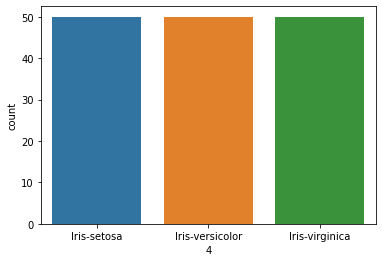

In [7]:
sns.countplot(x =dataset[4])

### | 모델


<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DeepLearning/blob/main/imgs/ch0105-02.PNG?raw=true width=800>
</p>


#### **모델 생성**

In [12]:
from tensorflow.keras import models, layers, utils
def build_model():
   x = layers.Input(shape = (4))
   y = layers.Dense(12,activation = 'relu')(x) 
   y = layers.Dense(8,activation = 'relu')(y) 
   y = layers.Dense(3, activation = 'softmax')(y) #이진분류 문제의 경우, 마지막 레이어에서 softmax 사용
   model = models.Model(x, y)
   return model

#### **모델 시각화**

* `model.summary()`
* `utils.plot_model()`

In [13]:
model = build_model()
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 4)]               0         
                                                                 
 dense (Dense)               (None, 12)                60        
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 3)                 27        
                                                                 
Total params: 191
Trainable params: 191
Non-trainable params: 0
_________________________________________________________________


### | 학습

#### **모델 컴파일**

```
model.compile(loss, optimizer, metrics) 
```
* `loss` : 분류 문제는 기본적으로 crossentroty
    * 이진분류 : binary_crossentropy
    * 다중분류 : categorical_
* `optimizer` : 
* `metrics`: 


In [17]:
model.compile(loss = 'categorical_crossentropy',
              optimizer ='adam',
              metrics = 'accuracy') 

#### **학습**

```
model.fit(x_train, y_train, epochs, batch_size)
```
* `x_train` : 넘파이 혹은 텐서 형식의 인풋 데이터
* `y_train` : 넘파이 혹은 텐서 형식의 아웃풋 데이터
* `epochs` : 학습 횟수
* `batch_size` : 배치 사이즈 ((업데이트 한번에 사용될 샘플 개수)

In [19]:
model.fit(x_train, y_train, epochs = 100, batch_size =10)

Epoch 1/100
11/11 [==============================] - 0s 4ms/step - loss: 0.2748 - accuracy: 0.9048
Epoch 2/100
11/11 [==============================] - 0s 4ms/step - loss: 0.2662 - accuracy: 0.9048
Epoch 3/100
11/11 [==============================] - 0s 3ms/step - loss: 0.2582 - accuracy: 0.9143
Epoch 4/100
11/11 [==============================] - 0s 3ms/step - loss: 0.2509 - accuracy: 0.9143
Epoch 5/100
11/11 [==============================] - 0s 4ms/step - loss: 0.2429 - accuracy: 0.9238
Epoch 6/100
11/11 [==============================] - 0s 4ms/step - loss: 0.2338 - accuracy: 0.9238
Epoch 7/100
11/11 [==============================] - 0s 4ms/step - loss: 0.2252 - accuracy: 0.9333
Epoch 8/100
11/11 [==============================] - 0s 4ms/step - loss: 0.2168 - accuracy: 0.9333
Epoch 9/100
11/11 [==============================] - 0s 4ms/step - loss: 0.2088 - accuracy: 0.9429
Epoch 10/100
11/11 [==============================] - 0s 5ms/step - loss: 0.2011 - accuracy: 0.9333
Epoch 11/

### | 검증 및 예측


#### **검증**

```
model.evaluate(x_test, y_test)
```
* `x_test` : 넘파이 혹은 텐서 형식의 인풋 테스트 데이터
* `y_test` : 넘파이 혹은 텐서 형식의 아웃풋 테스트 데이터

In [20]:
model.evaluate(x_test, y_test)

2/2 [==============================] - 0s 8ms/step - loss: 0.0871 - accuracy: 0.9556


[0.08708753436803818, 0.9555555582046509]

#### **예측**

```
model.predict(x_test)
```
* `x_test` : 넘파이 혹은 텐서 형식의 인풋 테스트 데이터
* `y_test` : 넘파이 혹은 텐서 형식의 아웃풋 테스트 데이터

In [32]:
y_pred = model.predict(x_test)
print(y_test.shape, y_pred.shape)

y_test_argmax = np.argmax(y_test, axis=1) #세개 클래스 중 가장 큰 값 인덱스
y_pred_argmax = np.argmax(y_pred, axis=1)

for i in range(10):
  print(f'실제y: {y_test[i]}={y_test_argmax[i]}, 예측y : {y_pred_argmax[i]}')

(45, 3) (45, 3)
실제y: [1. 0. 0.]=0, 예측y : 0
실제y: [0. 1. 0.]=1, 예측y : 1
실제y: [0. 1. 0.]=1, 예측y : 1
실제y: [1. 0. 0.]=0, 예측y : 0
실제y: [0. 0. 1.]=2, 예측y : 2
실제y: [0. 1. 0.]=1, 예측y : 1
실제y: [0. 0. 1.]=2, 예측y : 2
실제y: [1. 0. 0.]=0, 예측y : 0
실제y: [1. 0. 0.]=0, 예측y : 0
실제y: [0. 0. 1.]=2, 예측y : 2


* 예측 시각화

[[14  0  0]
 [ 0 17  1]
 [ 0  1 12]]


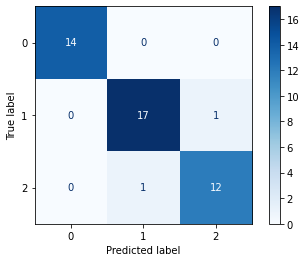

In [33]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test_argmax,y_pred_argmax)
print(cm)
ConfusionMatrixDisplay(cm).plot(cmap= 'Blues')

## 과제
---

### | 과제1. 이진분류 문제 정리

* 예측값의 범위 :0~1
* 예측값의 shape : (샘플수, 클래스의 개수)
* 아웃풋 레이어의 노드 개수 :  3
* 아웃풋 레이어의 activation : softmax
* 손실함수 (loss) : categorical_crossentropy
* 평가함수 (metrics) : accuracy(정확도)

### | 과제2. 한 셀에 코드 정리하기

* 추가 연습
  * 모델의 깊이(depth)를 늘려가며 학습해 보세요.
  * 모델의 너비(width)를 늘려가며 학습해 보세요.

[array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)]
(105, 4) (45, 4) (105, 3) (45, 3)
첫번째 샘플 x:[-1.02184904  0.80065426 -1.2844067  -1.31297673]
첫번째 샘플 y:[1. 0. 0.]
Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 4)]               0         
                                                                 
 dense_7 (Dense)             (None, 50)                250       
                                                                 
 dense_8 (Dense)             (None, 40)                2040      
                                                                 
 dense_9 (Dense)             (None, 30)                1230      
                                                                 
 dense_10 (Dense)            (None, 3)                 93        
                                                                 
To

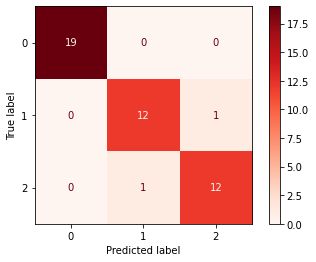

In [35]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder #머신러닝 라이브러리
from sklearn.model_selection import train_test_split
from tensorflow.keras import models, layers, utils

def path2dataset_iris(path):

  # <불러오기>
  dataset =  pd.read_csv(path, 
                       header=None, 
                       ) # 데이터 형식 : pandas의 데이터프레임
  dataset = dataset.values #데이터 형식 : 넘파이 배열로 변환
  # <x-y 분할> -> 넘파이 배열을 슬라이싱하는 기법
  x = dataset[:, 0:-1]  # ( : 모든행,첫번째 부터 마지막 전까지) * a:b -> a~b까지
  y = dataset[:, -1]    # 마지막꺼
  #print(x.shape, y.shape)


  # <정규화(속셩별로 데이터의 스케일을 조정)> # -x 데이터에만 해준다.
  scaler = StandardScaler()
  x = scaler.fit_transform(x)
  #print(dataset.shape, dataset.dtype) # 데이터 형식 : 넘파이 배열
  
  # <원핫 인코딩> y{[1,0,0],[0,1,0],[0,0,1]}
  onehot = OneHotEncoder(sparse=False)
  y = onehot.fit_transform(np.expand_dims(y,1)) #행렬 (샘플개수, 1)
  print(onehot.categories_)
  

  # <**train-test 분할**>
  x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)
  return x_train, x_test, y_train, y_test
  

path = '/content/SkillTreePython-DeepLearning/dataset/iris.csv'
x_train, x_test, y_train, y_test = path2dataset_iris(path)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)
print(f'첫번째 샘플 x:{x_train[0]}')
print(f'첫번째 샘플 y:{y_train[0]}')

def build_model():
   x = layers.Input(shape = (4))
   y = layers.Dense(50,activation = 'relu')(x) 
   y = layers.Dense(40,activation = 'relu')(y)
   y = layers.Dense(30,activation = 'relu')(y) 
   y = layers.Dense(3, activation = 'softmax')(y) #이진분류 문제의 경우, 마지막 레이어에서 softmax 사용
   model = models.Model(x, y)
   return model

model = build_model()
model.summary()

model.compile(loss = 'categorical_crossentropy',
              optimizer ='adam',
              metrics = 'accuracy') 

model.fit(x_train, y_train, epochs = 100, batch_size =10)

model.evaluate(x_test, y_test)

y_pred = model.predict(x_test)
print(y_test.shape, y_pred.shape)

y_test_argmax = np.argmax(y_test, axis=1) #세개 클래스 중 가장 큰 값 인덱스
y_pred_argmax = np.argmax(y_pred, axis=1)

for i in range(10):
  print(f'실제y: {y_test[i]}={y_test_argmax[i]}, 예측y : {y_pred_argmax[i]}')


from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test_argmax,y_pred_argmax)
print(cm)
ConfusionMatrixDisplay(cm).plot(cmap= 'Reds')

### | 과제 3. MNIST 숫자 데이터 분류

```
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)
```

In [51]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)
# 정규화 (x에대해서만 정규화) 이미지 데이터 : 0~255 -> 0~1
x_train = x_train/255.0
x_test = x_test/255.0

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

* 데이터 시각화

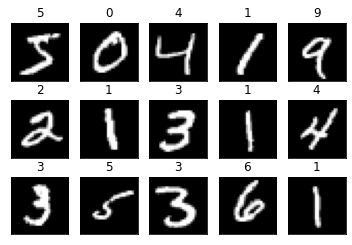

In [53]:
for i in range(15):
  img = x_train[i]
  label = y_train[i]
  plt.subplot(3,5,i+1)
  plt.imshow(img, cmap = 'gray')
  plt.title(label)
  plt.xticks([]);plt.yticks([])

### | 모델


<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DeepLearning/blob/main/imgs/ch0105-03.PNG?raw=true width=500>
</p>


#### **모델 생성**

In [98]:
from tensorflow.keras import models, layers, utils
def build_model():

   x = layers.Input(shape = (28,28))
   y = layers.Flatten()(x)
   y = layers.Dense(30,activation = 'relu')(y)
   y = layers.Dense(30,activation = 'relu')(y)
   y = layers.Dense(30,activation = 'relu')(y)
   y = layers.Dense(30,activation = 'relu')(y)
   y = layers.Dense(30,activation = 'relu')(y)
   y = layers.Dense(30,activation = 'relu')(y)
   y = layers.Dense(30,activation = 'relu')(y)
   y = layers.Dense(30,activation = 'relu')(y)
   y = layers.Dense(30,activation = 'relu')(y)
   y = layers.Dense(30,activation = 'relu')(y)
   y = layers.Dense(30,activation = 'relu')(y)
   y = layers.Dense(30,activation = 'relu')(y)
   y = layers.Dense(30,activation = 'relu')(y)
   y = layers.Dense(30,activation = 'relu')(y)
   y = layers.Dense(30,activation = 'relu')(y)


   #중간층
   y = layers.Dense(10, activation = 'softmax')(y) #마지막 레이어에서 softmax 사용
   model = models.Model(x, y)
   return model

#### **모델 시각화**

* `model.summary()`
* `utils.plot_model()`

In [99]:
model = build_model()
model.summary()

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 28, 28)]          0         
                                                                 
 flatten_17 (Flatten)        (None, 784)               0         
                                                                 
 dense_36 (Dense)            (None, 30)                23550     
                                                                 
 dense_37 (Dense)            (None, 30)                930       
                                                                 
 dense_38 (Dense)            (None, 30)                930       
                                                                 
 dense_39 (Dense)            (None, 30)                930       
                                                                 
 dense_40 (Dense)            (None, 30)                930 

### | 학습

#### **모델 컴파일**

```
model.compile(loss, optimizer, metrics) 
```
* `loss` : sparse_categorical_crossentropy  -> 원핫 인코딩을 안했을 때 사용
* `optimizer` : 
* `metrics`: 


In [100]:
model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer ='adam',
              metrics = 'accuracy')

#### **학습**

```
model.fit(x_train, y_train, epochs, batch_size)
```
* `x_train` : 넘파이 혹은 텐서 형식의 인풋 데이터
* `y_train` : 넘파이 혹은 텐서 형식의 아웃풋 데이터
* `epochs` : 학습 횟수
* `batch_size` : 배치 사이즈 ((업데이트 한번에 사용될 샘플 개수)

In [101]:
model.fit(x_train, y_train, epochs = 10, batch_size = 16)

Epoch 1/10
3750/3750 [==============================] - 13s 3ms/step - loss: 0.6115 - accuracy: 0.7831
Epoch 2/10
3750/3750 [==============================] - 12s 3ms/step - loss: 0.2733 - accuracy: 0.9265
Epoch 3/10
3750/3750 [==============================] - 12s 3ms/step - loss: 0.2147 - accuracy: 0.9434
Epoch 4/10
3750/3750 [==============================] - 12s 3ms/step - loss: 0.1846 - accuracy: 0.9513
Epoch 5/10
3750/3750 [==============================] - 12s 3ms/step - loss: 0.1648 - accuracy: 0.9568
Epoch 6/10
3750/3750 [==============================] - 12s 3ms/step - loss: 0.1528 - accuracy: 0.9597
Epoch 7/10
3750/3750 [==============================] - 12s 3ms/step - loss: 0.1399 - accuracy: 0.9633
Epoch 8/10
3750/3750 [==============================] - 14s 4ms/step - loss: 0.1337 - accuracy: 0.9649
Epoch 9/10
3750/3750 [==============================] - 14s 4ms/step - loss: 0.1271 - accuracy: 0.9672
Epoch 10/10
3750/3750 [==============================] - 12s 3ms/step - l

### | 검증 및 예측


#### **검증**

```
model.evaluate(x_test, y_test)
```
* `x_test` : 넘파이 혹은 텐서 형식의 인풋 테스트 데이터
* `y_test` : 넘파이 혹은 텐서 형식의 아웃풋 테스트 데이터

In [102]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1605 - accuracy: 0.9619


[0.16054844856262207, 0.961899995803833]

#### **예측**

```
model.predict(x_test)
```
* `x_test` : 넘파이 혹은 텐서 형식의 인풋 테스트 데이터
* `y_test` : 넘파이 혹은 텐서 형식의 아웃풋 테스트 데이터

In [104]:
y_pred = model.predict(x_test)
print(y_test.shape, y_pred.shape)

y_pred_argmax = np.argmax(y_pred, axis=1)

for i in range(10):
  print(f'실제y: {y_test[i]}, 예측y : {y_pred_argmax[i]}')

(10000,) (10000, 10)
실제y: 7, 예측y : 7
실제y: 2, 예측y : 2
실제y: 1, 예측y : 1
실제y: 0, 예측y : 0
실제y: 4, 예측y : 4
실제y: 1, 예측y : 1
실제y: 4, 예측y : 4
실제y: 9, 예측y : 9
실제y: 5, 예측y : 5
실제y: 9, 예측y : 9


* 예측 시각화

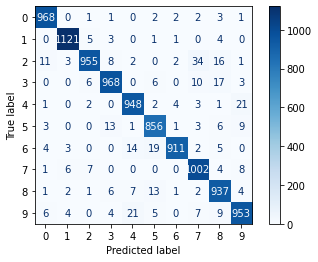

In [107]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test,y_pred_argmax)
#print(cm)
ConfusionMatrixDisplay(cm).plot(cmap= 'Blues')

* 모델 활용

9 [9.0453069e-04 9.3171315e-04 9.6995541e-04 1.2928101e-02 1.8657977e-02
 8.7335985e-03 3.4381046e-05 4.3441211e-03 1.9981889e-02 9.3251371e-01]


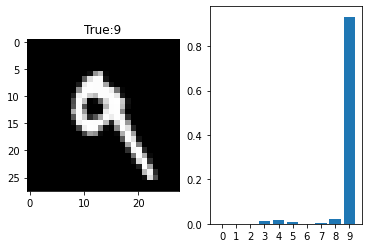

In [123]:
idx = 7 #n번째 샘플
img = x_test[idx]
label = y_test[idx]
pred = y_pred[idx]
pred_argmax = y_pred_argmax[idx]
print(label, pred)
plt.subplot(121);plt.imshow(img, cmap='gray');plt.title(f'True:{label}')
plt.subplot(122);plt.bar(range(10),pred);plt.xticks(range(10))
plt.show()